#### Import Library

In [1]:
import numpy as np
import pandas as pd

Dataset berikut adalah dataset mengenai penjualan bangunan

In [2]:
df_property = pd.read_csv("nyc-rolling-sales.csv")
df_property.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Melihat informasi dari dataset, baik dari jumlah data, jumlah kolom dan tipe data pada masing-masing kolom

In [3]:
df_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

Mengecek apakah terdapat NaN ataupun Null

In [4]:
df_property.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

Dikarenakan pada saat menampilkan head data terdapat value yang tidak sesuai (missing value) namun tidak terdeteksi dengan fungsi isnull() maka missing value tersebut perlu diubah menjadi NaN agar dapat lebih mudah untuk ditangani nantinya

In [5]:
missing_values = [" -  "]
df_property = pd.read_csv("nyc-rolling-sales.csv", na_values=missing_values)
df_property

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00


Disini akan dicek kembali dengan fungsi isnull()

In [6]:
df_property.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

Dari hasil pengecekan diketahui terdapat 3 kolom yang memiliki missing value, disini saya akan mengubah missing value menjadi nilai median dari nilai data dari setiap masing-masing kolom

In [7]:
median = df_property['LAND SQUARE FEET'].median()
df_property['LAND SQUARE FEET'].fillna(median, inplace=True)

In [8]:
median = df_property['GROSS SQUARE FEET'].median()
df_property['GROSS SQUARE FEET'].fillna(median, inplace=True)

In [9]:
median = df_property['SALE PRICE'].median()
df_property['SALE PRICE'].fillna(median, inplace=True)

Cek kembali dataset

In [10]:
df_property.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

#### Measure of Central Tendency

Disini saya akan berfokus pada data di tahun tertentu agar proses load lebih efisien. Pertama-tama disini mengecek dari tahun berapa sajakah dataset ini dibuat.

In [11]:
df_property['YEAR BUILT'].value_counts()

0       6970
1920    6045
1930    5043
1925    4312
1910    3585
        ... 
1888       1
1849       1
1855       1
1111       1
1680       1
Name: YEAR BUILT, Length: 158, dtype: int64

Setelah mengetauhi tahun kapan saja, disini saya berfokus pada tahun 1900

In [12]:
kondisi = df_property['YEAR BUILT'] == 1900
df_property_1900 = df_property[kondisi]
df_property_1900.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616.0,18690.0,1900,2,C7,530000.0,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212.0,7803.0,1900,2,C7,530000.0,2016-12-09 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581.0,9730.0,1900,2,C4,530000.0,2017-07-20 00:00:00


Mengecek kembali dataset

In [13]:
df_property_1900.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

##### Mean, Median, Modus, Max and Min -> Range, Variance, Standard Deviation

In [14]:
import statistics as st

In [15]:
df_property_1900.groupby("YEAR BUILT").agg({'SALE PRICE':[np.mean, np.median, st.mode, np.var, np.std]})

SALE PRICE                                                
                    mean    median      mode           var           std
YEAR BUILT                                                              
1900        2.689858e+06  739000.0  530000.0  6.753049e+13  8.217693e+06

Dikarenakan dalam melakukan agregasi tidak boleh terdapat sebuah operator maka untuk menghitung range perlu dilakukan secara manual

In [16]:
range_sale = np.max(df_property_1900['SALE PRICE']) - np.min(df_property_1900['SALE PRICE'])
range_sale

124700000.0

##### Distribution

Disini akan memvisualisasikan distribusi dari data pada kolom SALE PRICE di tahun 1900

Pertama-tama import library untuk visualisasinya

In [17]:
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(8,8)})

Lalu mempersiapkan paramater yang diperlukan, disini saya mengasumsikan datanya berdistribusi normal

In [18]:
from scipy.stats import norm

# generate data
n = len(df_property_1900['SALE PRICE'])
miu = df_property_1900['SALE PRICE'].mean()
sigma= 1
data_normal = norm.rvs(size=n, loc=miu, scale=sigma)

Lalu visualisasikan

C:\Users\ROG\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


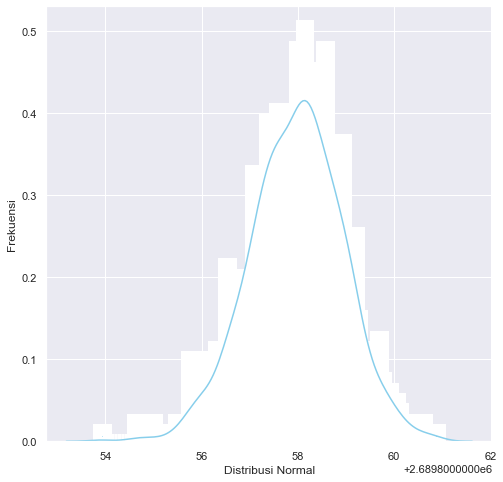

In [19]:
ax = sns.distplot(
    data_normal,
    bins=100,
    color='skyblue',
    hist_kws={'linewidth':15, 'alpha':1}
)
ax.set(xlabel="Distribusi Normal", ylabel='Frekuensi');

Diketahui dari hasil visualisasi bahwa persebaran data pada kolom SALE PRICE di tahun 1900 termasuk pada distribusi normal, namun karena jumlah datanya hanya 1130 maka bentuknya masih kurang sempurna

##### Confidence Intervals

Untuk confidence intervals disini saya berfokus pada jumlah bangunan yang dijual di masing-masing wilayah pada tahun 1900

Pertama-tama melihat terdapat berapa wilayahkah yang ada di dataset

In [20]:
df_property['BOROUGH'].value_counts()

4    26736
3    24047
1    18306
5     8410
2     7049
Name: BOROUGH, dtype: int64

Lalu melihat jumlah bangunan yang dijual di masing-masing wilayah pada tahun 1900

In [21]:
df_property_1900['BOROUGH'].value_counts()

1    833
3    268
4     12
2     10
5      7
Name: BOROUGH, dtype: int64

Mengubahnya menjadi dataframe agar dapat diolah dengan mudah dengan salah satunya fungsi-fungsi di dalam numpy

In [22]:
df_borough_1900 = pd.DataFrame(df_property_1900['BOROUGH'].value_counts())
df_borough_1900 = df_borough_1900.sort_index()
df_borough_1900

,BOROUGH
1,833
2,10
3,268
4,12
5,7


Menghitung total bangunan yang dijual

In [23]:
n = df_borough_1900['BOROUGH'].sum()
n

1130

Menghitung proporsi di wilayah 1

In [24]:
n = df_borough_1900['BOROUGH'].sum()
p_bor_1 = df_borough_1900['BOROUGH'][1] / n
p_bor_1, n

(0.7371681415929203, 1130)

Menghitung standard error

In [25]:
se_bor_1 = np.sqrt(p_bor_1 * (1 - p_bor_1) / n)
se_bor_1

0.013094323319578762

Menghitung confidence intervals (lower confidence boundary dan upper confidence boundary)

In [26]:
z_score = 1.96 #confidence intervals -> 95% (alpha = 5%)
lcb = p_bor_1 - z_score * se_bor_1
ucb = p_bor_1 + z_score * se_bor_1
lcb, ucb

(0.7115032678865459, 0.7628330152992947)

Dari hasil perhitungan diketahui bahwa jumlah penjualan bangunan di wilayah 1, dari total 1130 bangunan yang dijual dari seluruh wilayah, wilayah 1 menyumbang sebesar 71 hingga 76 persen bangunan yang dijual

Berikutnya disini mencoba menghitung confidence intervals dengan fungsi dari library statsodel untuk mengecek apakah perhitungan manual yang dilakukan sebelumnya sudah benar atau belum

In [27]:
import statsmodels.api as sm
sm.stats.proportion_confint(833, n)

(0.711503739484623, 0.7628325437012177)

Dari hasil confidence intervals yang didapat diketahui bahwa hasil perhitungan manual sudah sesuai

##### Hypothesis Testing

Dari hasil confident interval pada tahun 1900 diketahui bahwa pada wilayah (borough) 1 terdapat sebanyak 833 bangunan dari total 1130 bangunan yang dijual di 4 wilayah (borough) lainnya. Apakah pada tahun berikutnya akan terjadi peningkatan jumlah penjualan bangunan di wilayah (borough) 1?

Populasi : 1130

Parameter interest : p

Null Hypothesis : p = 833 / 1130

Alternative Hypothesis : p > 833 / 1130 (one side test)

Mengambil data yang akan digunakan dalam hypothesis, disini mengambil jumlah bangunan yang dijual di setiap wilayah pada tahun 1901

In [28]:
kondisi = df_property['YEAR BUILT'] == 1901
df_property_1901 = df_property[kondisi]
df_borough_1901 = pd.DataFrame(df_property_1901['BOROUGH'].value_counts())
df_borough_1901 = df_borough_1901.sort_index()
df_borough_1901

,BOROUGH
1,133
2,296
3,969
4,248
5,109


Menghitung nilai hypothesis null (pnull) dan phat dalam sampel

In [29]:
n_00 = df_borough_1900['BOROUGH'].sum()
n_01 = df_borough_1901['BOROUGH'].sum()
pnull = 833 / n_00
phat_sample = 133 / n_01

pnull, phat_sample

(0.7371681415929203, 0.07578347578347579)

Setelah itu dengan library stats menghitung proportions_ztest dengan value pada parameter alternative adalah larger karena hasil yang diinginkan disini adalah one side test

In [30]:
sm.stats.proportions_ztest(phat_sample * n_01, n_00, pnull, alternative='larger')

(-64.6195399982513, 1.0)

Diketahui dari hasil perhitungan diperoleh p valuenya adalah 1.0

Lalu dicek apakah sesuai dengan thresholdnya yaitu < 0.5

In [31]:
1.0 < 0.5

False

Dikarenakan tidak sesuai, maka p valuenya diterima sehingga hyphotesis alternativenya ditolak dan hypothesis nullnya diterima. Jadi jumlah penjualan bangunan di tahun 1901 berikutnya tidak lebih banyak dari tahun 1900